<a href="https://colab.research.google.com/github/Pallavi522/data_visualiztion/blob/main/data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import yfinance as yf


In [3]:
# Example: Loading data for a specific stock (e.g., Apple Inc.)
ticker = 'AAPL'
df = yf.download(ticker, start='2020-01-01', end='2023-01-01')
df['Date'] = df.index
df.set_index('Date', inplace=True)


[*********************100%***********************]  1 of 1 completed


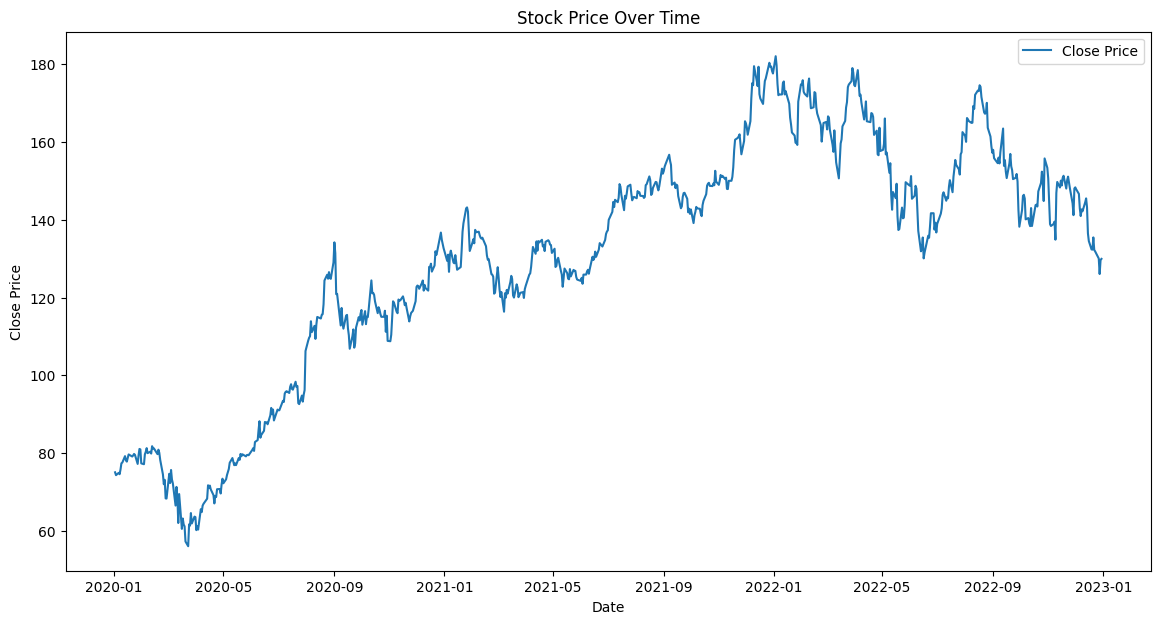

In [4]:
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [5]:
fig = make_subplots(rows=1, cols=1, shared_xaxes=True)

candlestick = go.Candlestick(x=df.index,
                             open=df['Open'],
                             high=df['High'],
                             low=df['Low'],
                             close=df['Close'],
                             name='Candlestick')
fig.add_trace(candlestick)

fig.update_layout(title='Candlestick Chart',
                  xaxis_title='Date',
                  yaxis_title='Price')
fig.show()


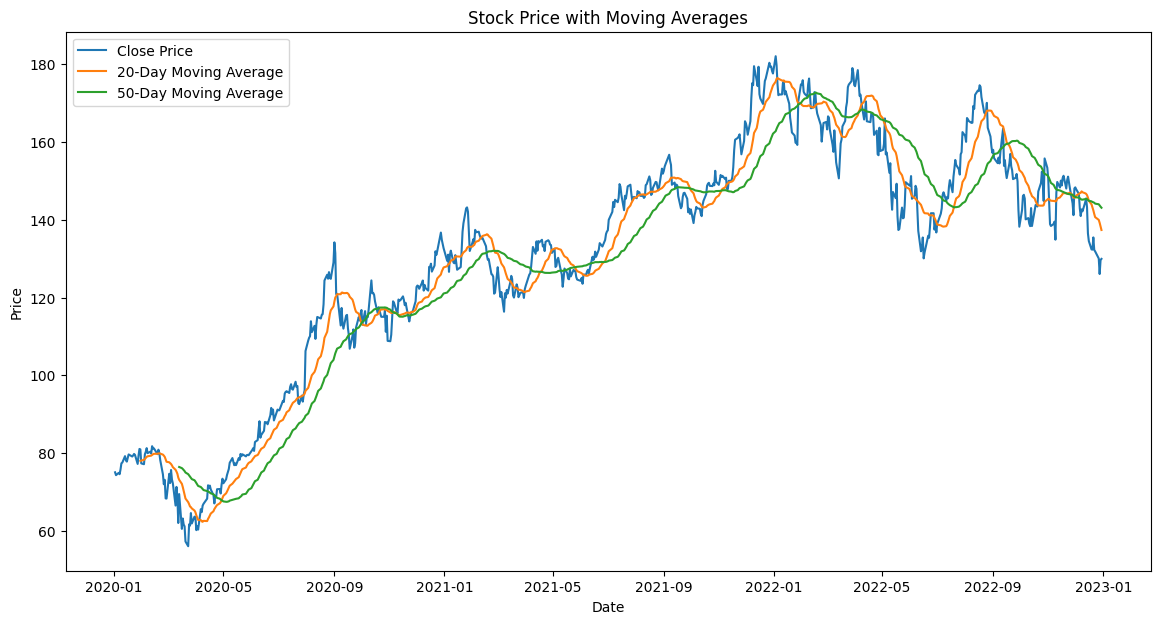

In [6]:
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()

plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['MA20'], label='20-Day Moving Average')
plt.plot(df['MA50'], label='50-Day Moving Average')
plt.title('Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


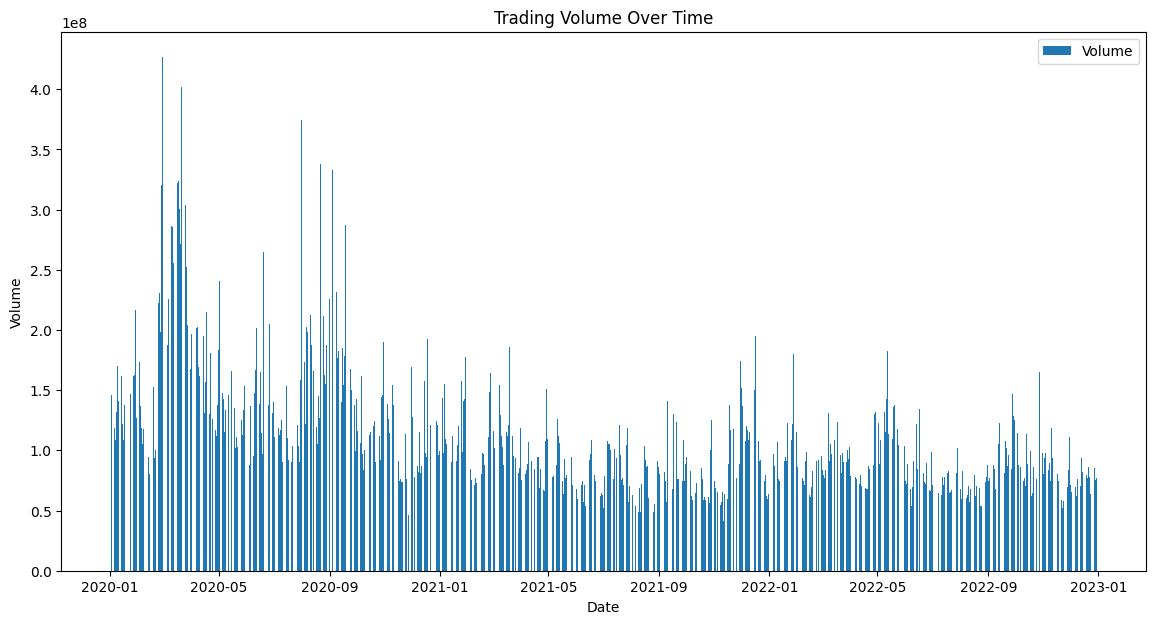

In [7]:
plt.figure(figsize=(14, 7))
plt.bar(df.index, df['Volume'], label='Volume')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()


In [8]:
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.1, subplot_titles=('OHLC', 'Volume'),
                    row_width=[0.2, 0.7])

fig.add_trace(go.Candlestick(x=df.index,
                             open=df['Open'],
                             high=df['High'],
                             low=df['Low'],
                             close=df['Close'],
                             name='Candlestick'), row=1, col=1)

fig.add_trace(go.Bar(x=df.index, y=df['Volume'], name='Volume'), row=2, col=1)

fig.update_layout(title='Stock Price and Volume',
                  xaxis_title='Date',
                  yaxis_title='Price',
                  yaxis2_title='Volume')

fig.show()


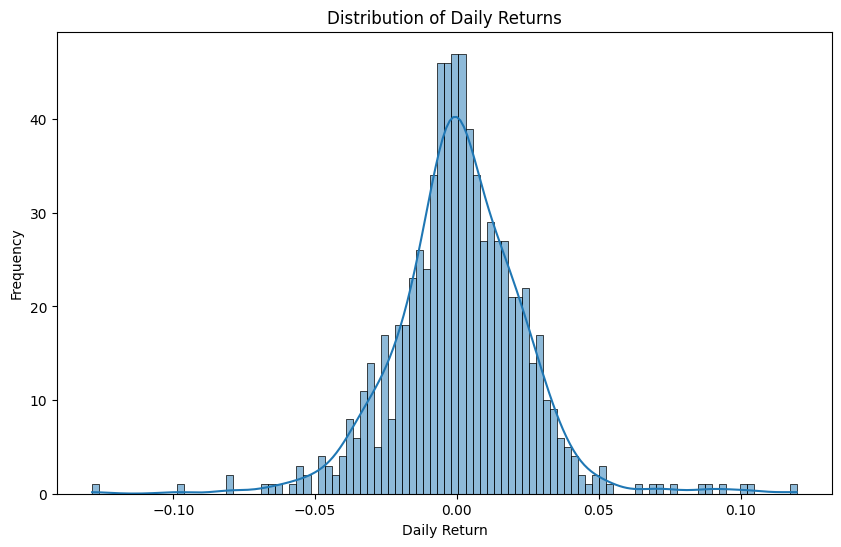

In [9]:
df['Daily Return'] = df['Close'].pct_change()

plt.figure(figsize=(10, 6))
sns.histplot(df['Daily Return'].dropna(), bins=100, kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()


[*********************100%***********************]  3 of 3 completed


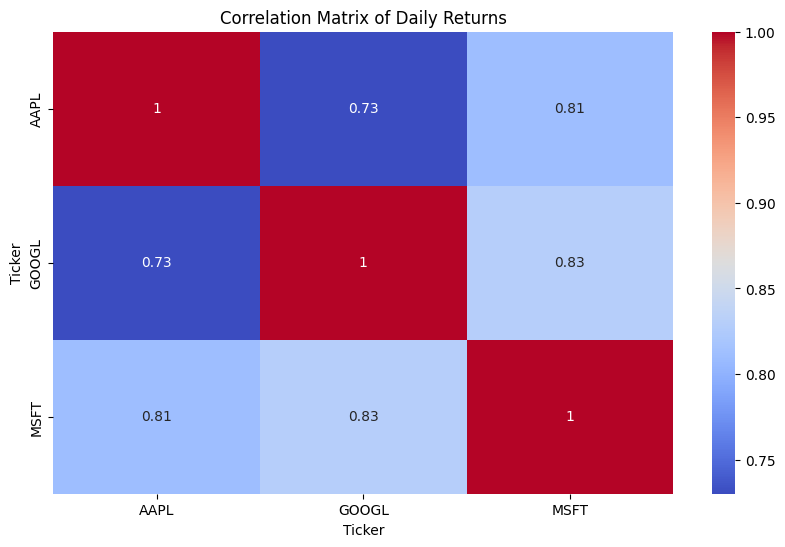

In [10]:
# Example: Download data for multiple stocks
tickers = ['AAPL', 'MSFT', 'GOOGL']
data = yf.download(tickers, start='2020-01-01', end='2023-01-01')['Close']

# Calculate daily returns
returns = data.pct_change()

# Plot correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(returns.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Daily Returns')
plt.show()


In [11]:
import time

# Function to get real-time stock price
def get_real_time_price(ticker):
    df = yf.download(ticker, period='1d', interval='1m')
    return df['Close'].iloc[-1]

# Example usage
ticker = 'AAPL'
while True:
    price = get_real_time_price(ticker)
    print(f'The current price of {ticker} is {price}')
    time.sleep(60)  # Update every minute


[*********************100%***********************]  1 of 1 completed


The current price of AAPL is 222.75


[*********************100%***********************]  1 of 1 completed


The current price of AAPL is 222.75


[*********************100%***********************]  1 of 1 completed


The current price of AAPL is 222.75


[*********************100%***********************]  1 of 1 completed


The current price of AAPL is 222.75


[*********************100%***********************]  1 of 1 completed


The current price of AAPL is 222.75


The current price of AAPL is 222.75


KeyboardInterrupt: 